# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [22]:
# TODO: Make all necessary imports.
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings('ignore')
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import matplotlib.pyplot as plt
import json
import tensorflow_hub as hub
import tf_keras
import time

print("success")

success


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [3]:
# TODO: Load the dataset with TensorFlow Datasets.
# TODO: Create a training set, a validation set and a test set.
(ds_train, ds_test,ds_validation),ds_info = tfds.load("oxford_flowers102",split=["train","test","validation"], as_supervised=True, with_info=True)



Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 11.58 MiB/s]

Extraction completed...:   0%|          | 0/6483 [01:18<?, ? file/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Extraction completed...:  21%|██        | 1729/8189 [01:43<01:22, 77.85 file/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 11.58 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Extraction completed...:  36%|███▌      | 2945/8189 [01:50<00:33, 156.91 file/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 11.58 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Extraction completed...:  43%|████▎     | 3481/8189 [01:53<00:28, 166.05 file/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:55<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Extraction completed...:  58%|█████▊    | 4729/8189 [02:01<00:20, 168.95 file/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Extraction completed...:  89%|████████▉ | 7269/8189 [02:15<00:05, 173.94 file/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 11.58 MiB/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 11.58 MiB/s]

Dl Size...: 100%|████████

Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete7MDHMW/oxford_flowers102-validation.tfrecord*...:   0%|          | 0/1020 [00:00<?, ? examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete7MDHMW/oxford_flowers102-validation.tfrecord*...:  70%|██████▉   | 711/1020 [00:00<00:00, 7106.99 examples/s]
2025-01-28 03:42:00.273574: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)                                                   


Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Explore the Dataset

In [4]:
# TODO: Get the number of examples in each set from the dataset info.
num_exmpl = ds_info.splits['train'].num_examples
print("\nThere are {:,} examples in the dataSet".format(num_exmpl))
# TODO: Get the number of classes in the dataset from the dataset info.
num_classes= ds_info.features['label'].num_classes
print("\nThe number of classes in the dataSet is: {:,}".format(num_classes))




There are 1,020 examples in the dataSet

The number of classes in the dataSet is: 102


In [5]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image,label in ds_train.take(3):
    print("\n the Lable is: ",label.numpy())
    print("\n And the shape is: ", image.shape)
    print("\n\n")


 the Lable is:  72

 And the shape is:  (500, 667, 3)




 the Lable is:  84

 And the shape is:  (500, 666, 3)




 the Lable is:  70

 And the shape is:  (670, 500, 3)





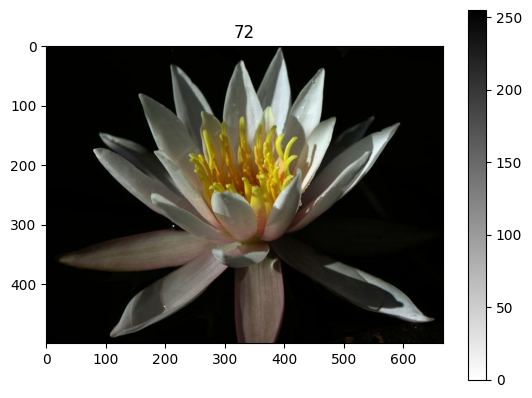

In [6]:
for image , label in ds_train.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap = plt.cm.binary)
plt.title(label)
plt.colorbar()
plt.show()

# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [7]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

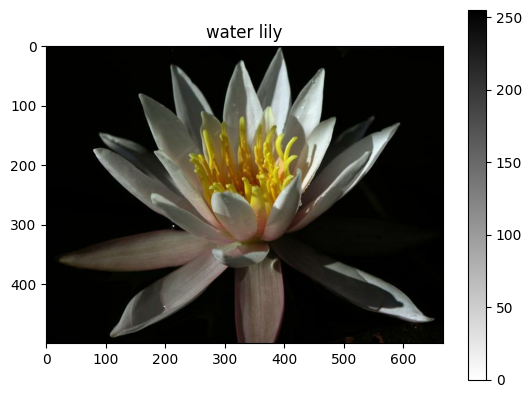

In [8]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image , label in ds_train.take(0):
    image = image.numpy().squeeze()
    label = label.numpy()
    
    
plt.imshow(image, cmap = plt.cm.binary)
plt.title(class_names.get(str(label)))
plt.colorbar()
plt.show()


## Create Pipeline

In [9]:
# TODO: Create a pipeline for each set.
print(image.shape)
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    
    image = tf.image.resize(image,(224, 224)) 
    image /= 255
    print("the shape is:", image.shape)
    return image, label

batch_size = 64

training_batch = ds_train.cache().shuffle(num_exmpl//4).map(normalize).batch(batch_size).prefetch(1)
validation_batch= ds_validation.cache().map(normalize).batch(batch_size).prefetch(1)
test_batch = ds_test.cache().map(normalize).batch(batch_size).prefetch(1)


for image, label in training_batch.take(1):
    print("hello")

(500, 667, 3)
the shape is: (224, 224, 3)
the shape is: (224, 224, 3)
the shape is: (224, 224, 3)
hello


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [10]:
# TODO: Build and train your network.
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMAGE_SHAPE = (224, 224,3)

model = tf_keras.Sequential([
    hub.KerasLayer(mobilenet_v2, input_shape=IMAGE_SHAPE),

    tf_keras.layers.Dropout(0.3),
    tf_keras.layers.Dense(102,activation = 'softmax')
])
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
import tensorflow as tf


epochs=30
#i really wanna make some comments for my self but i don't want it to look as it was ai :) :) 
history = model.fit(training_batch, validation_data=validation_batch, epochs=epochs)


Epoch 1/30
16/16 [==============================] - 38s 2s/step - loss: 5.3685 - accuracy: 0.0382 - val_loss: 3.5363 - val_accuracy: 0.1931
Epoch 2/30
16/16 [==============================] - 26s 2s/step - loss: 2.9081 - accuracy: 0.2941 - val_loss: 2.2618 - val_accuracy: 0.4863
Epoch 3/30
16/16 [==============================] - 26s 2s/step - loss: 1.6206 - accuracy: 0.6078 - val_loss: 1.6338 - val_accuracy: 0.6196
Epoch 4/30
16/16 [==============================] - 26s 2s/step - loss: 1.0618 - accuracy: 0.7637 - val_loss: 1.3198 - val_accuracy: 0.6863
Epoch 5/30
16/16 [==============================] - 26s 2s/step - loss: 0.7387 - accuracy: 0.8353 - val_loss: 1.1590 - val_accuracy: 0.7275
Epoch 6/30
16/16 [==============================] - 26s 2s/step - loss: 0.5095 - accuracy: 0.8941 - val_loss: 1.0709 - val_accuracy: 0.7490
Epoch 7/30
16/16 [==============================] - 25s 2s/step - loss: 0.3940 - accuracy: 0.9353 - val_loss: 1.0042 - val_accuracy: 0.7569
Epoch 8/30
16/16 [==

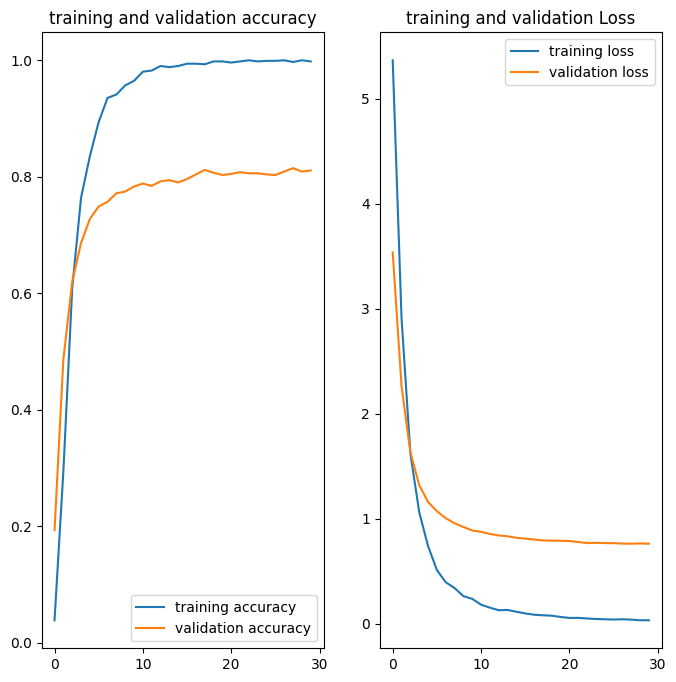

In [11]:
epochs=30
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='training accuracy')
plt.plot(epochs_range, validation_accuracy, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='training loss')
plt.plot(epochs_range, validation_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation Loss')
plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [12]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

loss, accuracy = model.evaluate(test_batch)

print(f"\nlos the test set si : {loss: ,.3f}")
print(f"and the accurcy is : {accuracy: .3%}")

97/97 [==============================] - 101s 1s/step - loss: 0.8893 - accuracy: 0.7720

los the test set si :  0.889
and the accurcy is :  77.200%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [33]:
# TODO: Save your trained model as a Keras model.
t = time.time()

save_keras = f'./{int(t)}.keras'
model.save(save_keras)

## Load the Keras Model

Load the Keras model you saved above.

In [36]:
# TODO: Load the Keras model
from tf_keras.models import load_model

saved_model = load_model(save_keras, custom_objects={'KerasLayer': hub.KerasLayer})
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 102)               102204    
                                                                 
Total params: 3642469 (13.89 MB)
Trainable params: 102204 (399.23 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [37]:
# TODO: Create the process_image function
def process_image(image):
    image = tf.convert_to_tensor(image)
    image = tf.image.resize(image, (224, 224))
    image = image / 255

    return image.numpy()
    


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

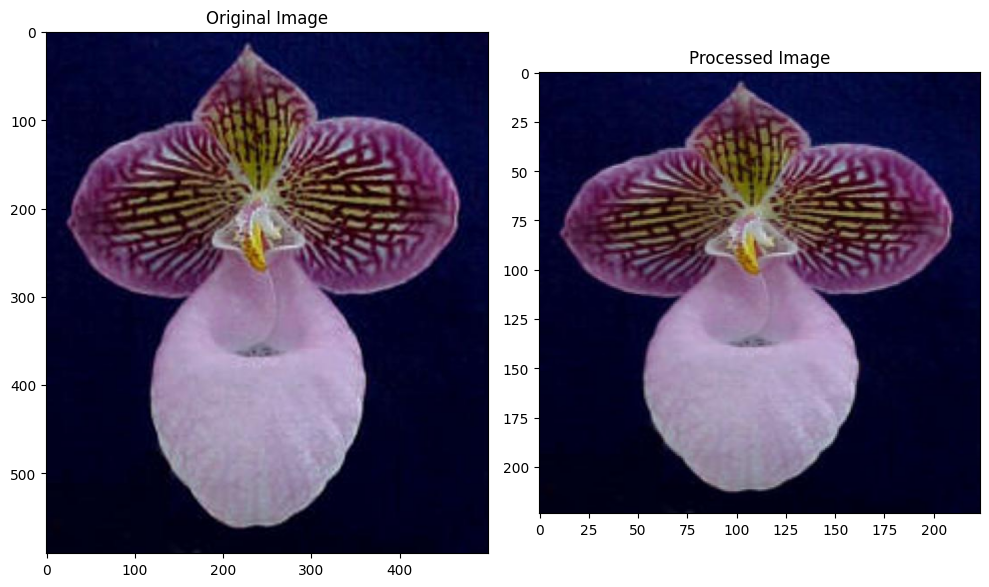

In [53]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [54]:
# TODO: Create the predict function

def predict(image_path, model, top_k=5):
    im = Image.open(image_path)
    test_image = np.asarray(im)
    image = process_image(test_image)
    image = np.expand_dims(image, axis=0)  

    predictions = model.predict(image)
    
    top_k_indices = np.argsort(predictions[0])[-top_k:]

    probs = predictions[0][top_k_indices]

    classes = [str(idx) for idx in top_k_indices]
    
    return probs, classes



# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 469ms/step


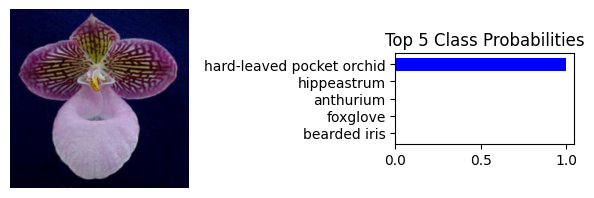

In [72]:
# TODO: Plot the input image along with the top 5 classes

image = Image.open(image_path)
first_image = image.resize((224, 224))
ps, classes = predict(image_path, model, top_k)

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap=plt.cm.binary)
ax1.axis('off')
ax1

ax2.barh(np.arange(top_k), ps, color='blue')  
ax2.set_aspect(0.1)

class_labels = [class_names.get(str(label)) for label in classes]

ax2.set_yticks(np.arange(top_k))
ax2.set_yticklabels(class_labels)  
ax2.set_title('Top 5 Class Probabilities')

plt.tight_layout()